# Lightning Introduction to Python - part 3

## Transforming and showing numerical data

There are many modules available for scientific computation, but the most basic and frequently used workhorses are Numpy (http://www.numpy.org), SciPy (https://www.scipy.org/scipylib/index.html), and Matplotlib (https://matplotlib.org). Numpy provides an efficent _array_ structure that is a basis for many scientific applications, such as SciPy. Matplotlib is the most widely used plotting module. These modules contain tons of functions that you can read about, but here we show some of the use examples that can be useful in the course.

## Reading and writing data files

Here we demonstrate how to read a text data 

In [2]:
import numpy as np
import scipy.io

import matplotlib.pyplot as plt
%matplotlib nbagg
# %matplotlib inline

Here we use Numpy's `loadtxt` to load our data in a text file.

In [3]:
isi = np.loadtxt('data/isis_184.txt') # load the text da
print(isi)

[ 32.48  28.36  13.44 ... 125.72  38.76  34.96]


Here we want to compare what the data look like when we take log of them.

<IPython.core.display.Javascript object>


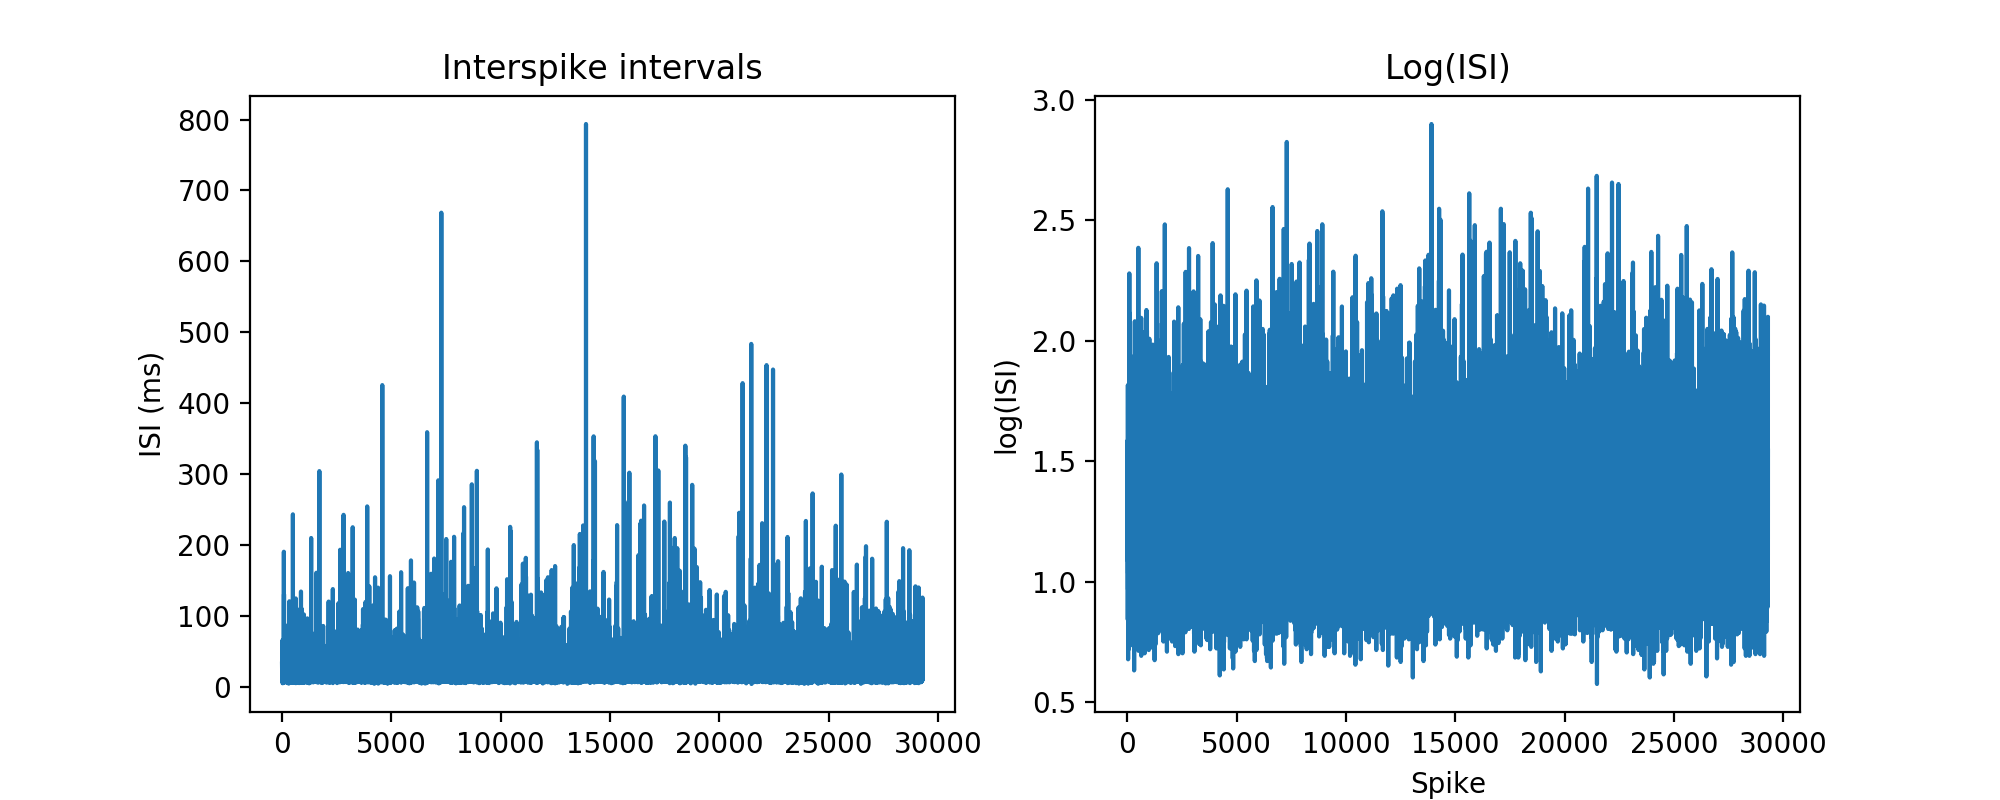

[Text(0,0.5,'log(ISI)'), Text(0.5,0,'Spike'), Text(0.5,1,'Log(ISI)')]

In [5]:
logisi = np.log10(isi)

# Following http://pbpython.com/effective-matplotlib.html
_, ax = plt.subplots(ncols=2, figsize=(10, 4))
ax[0].plot(isi)
ax[1].plot(logisi)
ax[0].set(title = "Interspike intervals", xlabel="", ylabel="ISI (ms)")
ax[1].set(title = "Log(ISI)", xlabel="Spike", ylabel="log(ISI)")

Now we compute a histogram of the data. Note that `bins` in the result represent left and right edges of the bins, and is bigger than `counts`.

In [6]:
counts, bins = np.histogram(logisi, bins=50)
print(bins)
print('Bin size = ', bins.size)
print(counts)
print('Counts = ', counts.size)

[0.57518784 0.62167787 0.6681679  0.71465793 0.76114795 0.80763798
 0.85412801 0.90061804 0.94710806 0.99359809 1.04008812 1.08657815
 1.13306817 1.1795582  1.22604823 1.27253825 1.31902828 1.36551831
 1.41200834 1.45849836 1.50498839 1.55147842 1.59796845 1.64445847
 1.6909485  1.73743853 1.78392855 1.83041858 1.87690861 1.92339864
 1.96988866 2.01637869 2.06286872 2.10935875 2.15584877 2.2023388
 2.24882883 2.29531885 2.34180888 2.38829891 2.43478894 2.48127896
 2.52776899 2.57425902 2.62074905 2.66723907 2.7137291  2.76021913
 2.80670916 2.85319918 2.89968921]
Bin size =  51
[   6   18   49  122  226  406  707  959 1337 1576 1764 1945 2251 2227
 2207 2003 1941 1687 1528 1260 1058  885  692  556  438  330  254  213
  143  132   86   70   52   41   27   26   18   13   14    6    6    6
    5    1    4    1    0    0    1    1]
Counts =  50


Now we plot the histogram, and also log of the counts, side by side.

<IPython.core.display.Javascript object>


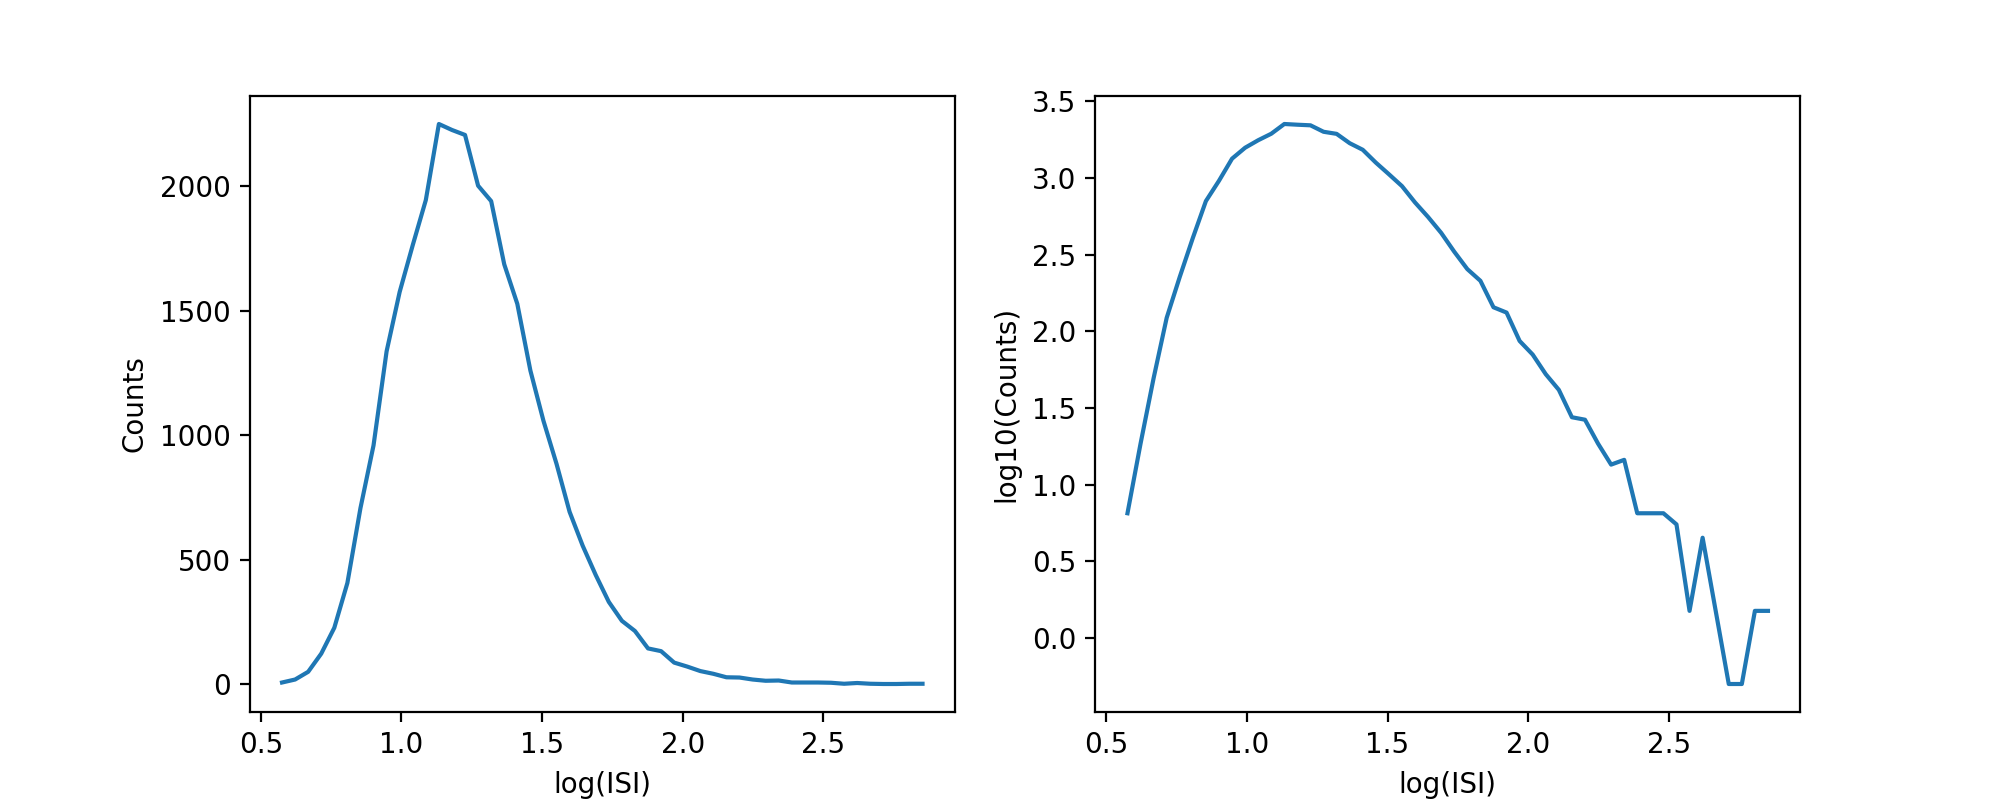

[Text(0,0.5,'log10(Counts)'), Text(0.5,0,'log(ISI)')]

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].plot(bins[:-1], counts)                  # Note indexing
ax[0].set(xlabel="log(ISI)", ylabel="Counts")

log_counts = np.log10(counts+0.5)
ax[1].plot(bins[:-1], log_counts)
ax[1].set(xlabel="log(ISI)", ylabel="log10(Counts)")


We save this figure as a PNG file, and save bins, counts and log(counts) into a MATLAB file.

In [ ]:
fig.savefig("histograms_logisi_184.png")

scipy.io.savemat("data_histograms_logisi_184.mat",
                 {
                     "bins": bins,
                     "counts": counts,
                     "log_counts": log_counts
                 })

Let's check if everything is saved correctly!

In [ ]:
data = scipy.io.loadmat('data_histograms_logisi_184.mat')
print(data)

In [ ]:
bins = data['bins']
counts = data['counts']
log_counts = data['log_counts']


fig, ax = plt.subplots(ncols=2, figsize=(16,5))
ax[0].plot(bins[:-1], counts)
ax[0].set(xlabel="log(ISI)", ylabel="Counts")

log_counts = np.log10(counts+0.5)
ax[1].plot(bins[:-1], log_counts)
ax[1].set(xlabel="log(ISI)", ylabel="log10(Counts)")